# Creating map that displays slvalbard glaciers (different classes)

In [1]:
import pandas as pd
import geopandas as gpd

import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas as gpd
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import rioxarray as rxr

# from matplotlib import matplotlib.patches.Polygon

### Import database

In [2]:
pwd

'/home/colili/Documents/PhD/project_john/Code/data_acquisition'

In [3]:
df = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_main.csv', index_col=0)
df.head()

,rgiid,x,y,Surge,Area,Slope,TermType,Name,bed,thickness,surface_elevation,ELA,beta,cmb,width_centerline,Runoff
206,RGI60-07.00004,524657.521964,8.539931e+06,0,1.044,13.8,0,NaN,889.68555,25.314478,915.0,432.103017,0.005069,1.392706,279.780932,1.100061
207,RGI60-07.00004,524681.113471,8.539955e+06,0,1.044,13.8,0,NaN,882.06460,30.935455,913.0,432.421537,0.005068,1.391001,295.980219,1.094416
208,RGI60-07.00004,524704.704977,8.539980e+06,0,1.044,13.8,0,NaN,882.06460,30.935455,913.0,432.740057,0.005068,1.389296,330.851846,1.088771
209,RGI60-07.00004,524728.296484,8.540004e+06,0,1.044,13.8,0,NaN,882.06460,30.935455,913.0,433.058576,0.005067,1.387591,342.886985,1.083127
210,RGI60-07.00004,524751.887990,8.540028e+06,0,1.044,13.8,0,NaN,881.31860,34.681380,916.0,433.377096,0.005067,1.385886,336.403639,1.077530


In [4]:
df[df.rgiid=='RGI60-07.00344']

,rgiid,x,y,Surge,Area,Slope,TermType,Name,bed,thickness,surface_elevation,ELA,beta,cmb,width_centerline,Runoff
29787,RGI60-07.00344,534383.286937,8.650985e+06,0,36.087,10.2,0,Slakbreen,941.177000,8.917528,950.09454,560.456407,0.003184,1.254900,605.439582,0.812764
29788,RGI60-07.00344,534479.747829,8.650893e+06,0,36.087,10.2,0,Slakbreen,880.256900,28.240356,908.49725,558.634604,0.003176,1.244464,643.928097,0.875421
29789,RGI60-07.00344,534573.716143,8.650896e+06,0,36.087,10.2,0,Slakbreen,853.378660,33.376984,886.75560,558.054423,0.003177,1.242065,672.273005,0.894159
29790,RGI60-07.00344,534667.684464,8.650898e+06,0,36.087,10.2,0,Slakbreen,853.378660,33.376984,886.75560,557.474242,0.003179,1.239667,733.216797,0.914020
29791,RGI60-07.00344,534761.652793,8.650901e+06,0,36.087,10.2,0,Slakbreen,841.007140,35.319620,876.32680,560.025821,0.003202,1.203764,864.432374,0.933882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29916,RGI60-07.00344,530279.577544,8.656800e+06,0,36.087,10.2,0,Slakbreen,163.762120,38.908157,202.67027,558.292289,0.004867,-1.265648,541.615800,0.790246
29917,RGI60-07.00344,530185.609599,8.656797e+06,0,36.087,10.2,0,Slakbreen,156.653410,35.637505,192.29092,559.027125,0.004874,-1.246778,508.036134,0.775026
29918,RGI60-07.00344,530091.641662,8.656795e+06,0,36.087,10.2,0,Slakbreen,153.256150,28.564688,181.82083,559.761962,0.004882,-1.227908,542.466095,0.759806
29919,RGI60-07.00344,530000.166793,8.656699e+06,0,36.087,10.2,0,Slakbreen,129.876360,29.655045,159.53140,559.822369,0.004871,-1.211023,592.497853,0.741839


In [5]:
df_map = df.groupby('rgiid').median()
df_map.drop(columns=['Slope', 'bed', 'thickness', 'surface_elevation', 'ELA', 'beta', 'cmb', 'width_centerline'])
df_map.to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_map.csv')
df_map.shape

(986, 14)

### Import outlines glaciers

In [6]:
outlines = gpd.read_file('/home/colili/Documents/PhD/project_john/data_set/RGI60/07_rgi60_Svalbard.shp')
outlines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
outlines

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-07.00001,G017035E76705N,20080901,-9999999,17.03470,76.7052,7,1,0.597,142,...,204,1388,0,0,0,0,0,9,None,"POLYGON ((17.04394 76.70809, 17.04550 76.70786..."
1,RGI60-07.00002,G016189E76787N,20080901,-9999999,16.18910,76.7872,7,1,0.581,234,...,277,1658,0,0,0,0,0,9,Bungebreen,"POLYGON ((16.18270 76.78964, 16.18376 76.78945..."
2,RGI60-07.00003,G016392E76919N,20080901,-9999999,16.39150,76.9194,7,1,0.388,157,...,222,1200,0,0,0,0,0,9,Samarinbreen East,"POLYGON ((16.39402 76.91657, 16.38829 76.91492..."
3,RGI60-07.00004,G015993E76942N,20080901,-9999999,15.99320,76.9423,7,1,1.044,665,...,62,1075,0,0,0,0,0,9,None,"POLYGON ((16.00754 76.93687, 16.00469 76.93646..."
4,RGI60-07.00005,G016497E76956N,20080901,-9999999,16.49660,76.9564,7,1,0.500,186,...,35,1068,0,0,0,0,0,9,Mendelejevbreen,"POLYGON ((16.50410 76.95932, 16.50751 76.95921..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,RGI60-07.01611,G351697E71005N,19759999,-9999999,-8.30305,71.0045,7,2,0.074,233,...,239,355,0,0,0,0,9,9,NO4W00110523,"POLYGON ((-8.30641 71.00458, -8.30689 71.00540..."
1611,RGI60-07.01612,G351691E71009N,19759999,-9999999,-8.30939,71.0093,7,2,0.189,337,...,163,350,0,0,0,0,9,9,NO4W00110524,"POLYGON ((-8.29901 71.01445, -8.29859 71.01512..."
1612,RGI60-07.01613,G351709E71023N,19759999,-9999999,-8.29079,71.0226,7,2,0.168,539,...,180,923,0,0,0,0,9,9,NO4W00110525,"POLYGON ((-8.29985 71.02117, -8.29842 71.02178..."
1613,RGI60-07.01614,G351682E71020N,19759999,-9999999,-8.31797,71.0200,7,2,0.055,444,...,209,438,0,0,0,0,9,9,NO4W00110526,"POLYGON ((-8.31595 71.01987, -8.31750 71.01937..."


In [8]:
outlines = outlines.to_crs("EPSG:32633")
outlines.shape

(1615, 23)

In [9]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
import rasterio.features
import rasterio.warp

In [85]:
import cartopy.crs as ccrs
import numpy as np

def scale_bar(ax, length=None, location=(0.8, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
#     tmc = ccrs.TransverseMercator(sbllx, sblly)
    tmc = ccrs.UTM(33, southern_hemisphere=False, globe=None)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom', fontsize=15)

In [11]:
outlines

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-07.00001,G017035E76705N,20080901,-9999999,17.03470,76.7052,7,1,0.597,142,...,204,1388,0,0,0,0,0,9,None,"POLYGON ((552447.714 8515108.991, 552488.723 8..."
1,RGI60-07.00002,G016189E76787N,20080901,-9999999,16.18910,76.7872,7,1,0.581,234,...,277,1658,0,0,0,0,0,9,Bungebreen,"POLYGON ((530169.210 8523602.240, 530196.700 8..."
2,RGI60-07.00003,G016392E76919N,20080901,-9999999,16.39150,76.9194,7,1,0.388,157,...,222,1200,0,0,0,0,0,9,Samarinbreen East,"POLYGON ((535223.263 8537880.445, 535082.750 8..."
3,RGI60-07.00004,G015993E76942N,20080901,-9999999,15.99320,76.9423,7,1,1.044,665,...,62,1075,0,0,0,0,0,9,None,"POLYGON ((525420.240 8539945.740, 525348.970 8..."
4,RGI60-07.00005,G016497E76956N,20080901,-9999999,16.49660,76.9564,7,1,0.500,186,...,35,1068,0,0,0,0,0,9,Mendelejevbreen,"POLYGON ((537882.238 8542717.831, 537968.424 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,RGI60-07.01611,G351697E71005N,19759999,-9999999,-8.30305,71.0045,7,2,0.074,233,...,239,355,0,0,0,0,9,9,NO4W00110523,"POLYGON ((-328119.245 8039866.898, -328100.321..."
1611,RGI60-07.01612,G351691E71009N,19759999,-9999999,-8.30939,71.0093,7,2,0.189,337,...,163,350,0,0,0,0,9,9,NO4W00110524,"POLYGON ((-327449.611 8040792.920, -327407.037..."
1612,RGI60-07.01613,G351709E71023N,19759999,-9999999,-8.29079,71.0226,7,2,0.168,539,...,180,923,0,0,0,0,9,9,NO4W00110525,"POLYGON ((-327192.922 8041504.286, -327118.485..."
1613,RGI60-07.01614,G351682E71020N,19759999,-9999999,-8.31797,71.0200,7,2,0.055,444,...,209,438,0,0,0,0,9,9,NO4W00110526,"POLYGON ((-327794.005 8041591.247, -327867.482..."


In [78]:
import matplotlib as mpl

cmap = mpl.cm.get_cmap('BrBG')
colors = {0:cmap(0), 1:cmap(0.25), 2:cmap(0.5), 3:cmap(0.75), 9:cmap(1)}
outlines['color'] = outlines.Surging.apply(lambda x: colors[x])

In [87]:
pwd

'/home/colili/Documents/PhD/project_john/Code/data_acquisition'

/home/colili/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/colili/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


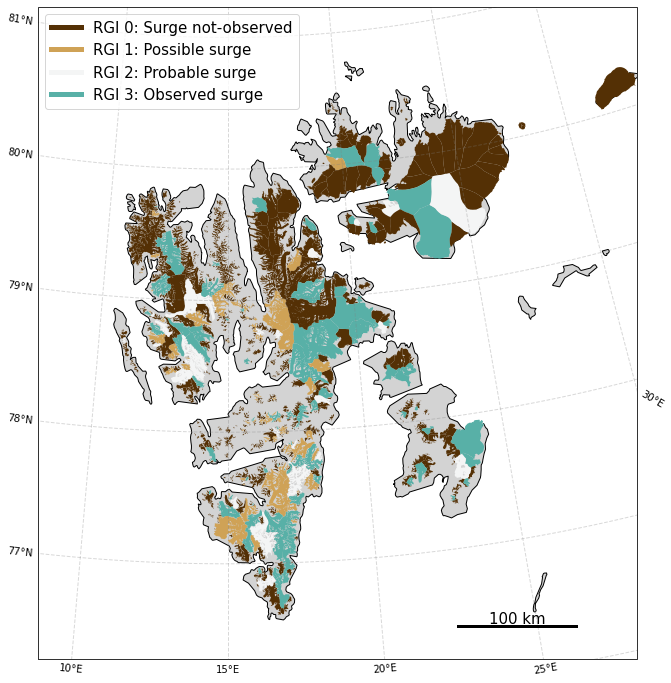

In [90]:
# avg_loc_center = svalbard_glaciers[svalbard_glaciers.GLACIER_NAME.isin(centerlines_glacs)].groupby('GLACIER_NAME').mean()
svalbard_bounding_box = {'left_lon':9.9, 'right_lon':26.2, 'bottom_lat':76.276, 'top_lat':80.5}
fig, ax = plt.subplots(1, figsize=(20,12))

# proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
# proj = ccrs.Mercator() 
proj = ccrs.UTM(33, southern_hemisphere=False, globe=None)# the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

# ax.add_feature(cartopy.feature.OCEAN            # add ocean feature
#                , zorder=0                       # layer where ocean should plot; 0 is base   
#                , facecolor='w'                  # color of the ocean
#               )           

ax.add_feature(cartopy.feature.LAND             # add continent feature
               , zorder=0                       # layer where continent should plot; 0 is base
               , edgecolor='black'              # coastline color
               , facecolor='lightgray'          # continent color
              ) 
# [df_map.Surge==0].x.values


ax.add_geometries(outlines.geometry.values, facecolor=outlines.color.values, crs=proj)

ax.set_extent([svalbard_bounding_box['left_lon']-1,
               svalbard_bounding_box['right_lon']+2,
               svalbard_bounding_box['bottom_lat'],
               svalbard_bounding_box['top_lat']+0.5
              ], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True              # label coordinates
                , linewidth=1                   # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.3
                , linestyle='--')
    
gl.xlabels_top = gl.ylabels_right = gl.ylabels_top = False 
gl.ylabels_bottom = True # where labels shouldn't be
gl.xlines = True  
gl.ylines = True  # turn off x-axis
gl.xlocator = mticker.FixedLocator([10, 15, 20, 25, 30])        # sets longitude tick marks
# gl.ylocator = mticker.FixedLocator([-180, -90, 0, 90, 180])  
gl.xformatter = LONGITUDE_FORMATTER                                # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER

# legend_colors = outlines.color.unique()

ax.plot([],[], label='RGI 0: Surge not-observed',linewidth=5, color=cmap(0))
ax.plot([],[], label='RGI 1: Possible surge', linewidth=5, color=cmap(0.25))
ax.plot([],[], label='RGI 2: Probable surge', linewidth=5, color=cmap(0.5))
ax.plot([],[], label='RGI 3: Observed surge', linewidth=5, color=cmap(0.75))
ax.legend(fontsize=15, loc='upper left')

scale_bar(ax, 100)

plt.savefig('/home/colili/Documents/PhD/project_john/Figure_produced/Raw/RGI_svalbard_map.pdf', bbox_inches='tight')

    
# ax.scatter(df_map[df_map.Surge==0].x.values
#            ,df_map[df_map.Surge==0].y.values               # plots your data points on the axes
#         , marker='o'                                 # symbol for data point
#         , c='cyan'                               # symbol facecolor
# #         , edgecolor='black'                          # symbol edgecolor
#         , alpha=1
#         , s=20
# #         , s=250# opacity
# # # #         , transform=ccrs.PlateCarree()
#         ,label='RGI 0: Not observed')              # projection to plot data in

In [16]:
import rasterio as rio
from matplotlib import pyplot
import rasterio.features
import rasterio.warp
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import numpy as np


dtm = rio.open('/home/colili/Documents/PhD/project_john/data_set/Npi_dem/Geonorge_DTM50/S0_DTM50.tif')
elevation = dtm.read(1)
elevation[elevation < 0] = np.nan

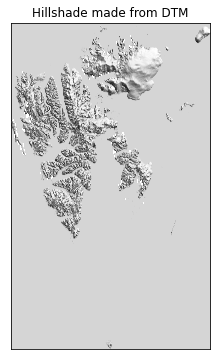

In [17]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DTM",
    figsize=(10, 6),
)
plt.show()

In [18]:
dst_crs = 'EPSG:32633' # WGS84 - UTM33N
# dst_crs = 'EPSG:32662' # WGS84 - UTM33N

with rasterio.open('/home/colili/Documents/PhD/project_john/data_set/Npi_dem/Geonorge_DTM50/S0_DTM50.tif') as dtm:
    transform, width, height = calculate_default_transform(
        dtm.crs, dst_crs, dtm.width, dtm.height, *dtm.bounds)
    kwargs = dtm.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('/home/colili/Documents/PhD/project_john/data_set/Npi_dem/Geonorge_DTM50/S0_DTM50_UTM33.tif', 'w', **kwargs) as dst:
        for i in range(1, dtm.count + 1):
            reproject(
                source=rasterio.band(dtm, i),
                destination=rasterio.band(dst, i),
                src_transform=dtm.transform,
                src_crs=dtm.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

CRSError: The EPSG code is unknown. PROJ: proj_create_from_database: /home/colili/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.

In [ ]:
dtm2 = rio.open('/home/colili/Documents/PhD/project_john/data_set/Npi_dem/Geonorge_DTM50/S0_DTM50_UTM33.tif')
elevation = dtm2.read(1)
elevation[elevation < 0] = np.nan

In [ ]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DTM",
    figsize=(10, 6),
)
plt.show()

In [ ]:
# avg_loc_center = svalbard_glaciers[svalbard_glaciers.GLACIER_NAME.isin(centerlines_glacs)].groupby('GLACIER_NAME').mean()
svalbard_bounding_box = {'left_lon':9.9, 'right_lon':26.2, 'bottom_lat':76.276, 'top_lat':80.5}
fig, ax = plt.subplots(1, figsize=(20,12))

# proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
# proj = ccrs.Mercator() 
# proj = ccrs.UTM(33, southern_hemisphere=False, globe=None)# the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
# ax = plt.axes(projection=proj)                  # sets the projection

ax = ep.plot_bands(hillshade,
    ax = ax,
    cbar=False,
)

# ax.add_feature(cartopy.feature.OCEAN            # add ocean feature
#                , zorder=0                       # layer where ocean should plot; 0 is base   
#                , facecolor='w'                  # color of the ocean
#               )           

# ax.add_feature(cartopy.feature.LAND             # add continent feature
#                , zorder=0                       # layer where continent should plot; 0 is base
#                , edgecolor='black'              # coastline color
#                , facecolor='lightgray'          # continent color
#               ) 

# ax.add_geometries(outlines['geometry']
#                   , facecolor='none'
#                   , edgecolor='grey'
#                   , alpha=0.5
#                   , crs=proj)

# ax.coastlines(resolution='110m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details
                
# gl = ax.gridlines(crs=ccrs.PlateCarree()        
#                 , draw_labels=True              # label coordinates
#                 , linewidth=2                   # line properties can be changed similar to matplotlib
#                 , color='gray'
#                 , alpha=0.5
#                 , linestyle='--')

# gl.xlabels_top = gl.ylabels_right = False                          # where labels shouldn't be
# gl.xlines = True  
# gl.ylines = True  # turn off x-axis
# gl.ylabels_bottom = True
# gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])        # sets longitude tick marks
# gl.xformatter = LONGITUDE_FORMATTER                                # set cartopy formatting
# gl.yformatter = LATITUDE_FORMATTER

# gl.xlabel_style = {'size': 15, 'color': 'gray'}                    # change features about the longitude labels
# gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.scatter(df_map[df_map.Surge==0].x.values
           ,df_map[df_map.Surge==0].y.values               # plots your data points on the axes
        , marker='o'                                 # symbol for data point
        , c='cyan'                               # symbol facecolor
#         , edgecolor='black'                          # symbol edgecolor
        , alpha=1
        , s=20
#         , s=250# opacity
# # #         , transform=ccrs.PlateCarree()
        ,label='RGI 0: Not observed')              # projection to plot data in

# ax.scatter(df_map[df_map.Surge==1].x.values
#            ,df_map[df_map.Surge==1].y.values               # plots your data points on the axes
#         , marker='o'                                 # symbol for data point
#         , c='chartreuse'                               # symbol facecolor
# #         , edgecolor='black'                          # symbol edgecolor
#         , alpha=1
#         , s=20
# #         , s=250# opacity
# # #         , transform=ccrs.PlateCarree()
#           ,label='RGI 1: Possible')              # projection to plot data in

# ax.scatter(df_map[df_map.Surge==2].x.values
#            ,df_map[df_map.Surge==2].y.values               # plots your data points on the axes
#         , marker='o'                                 # symbol for data point
#         , c='blue'                               # symbol facecolor
# #         , edgecolor='black'                          # symbol edgecolor
#         , alpha=1
#         , s=20
# #         , s=250# opacity
# #         , transform=ccrs.PlateCarree()
#           ,label='RGI 2: Probable')              # projection to plot data in

# ax.scatter(df_map[df_map.Surge==3].x.values
#            ,df_map[df_map.Surge==3].y.values               # plots your data points on the axes
#         , marker='o'                                 # symbol for data point
#         , c='deeppink'                               # symbol facecolor
# #         , edgecolor='black'                          # symbol edgecolor
#         , alpha=1
#         , s=20
# #         , s=250# opacity
# #         , transform=ccrs.PlateCarree()
#           ,label='RGI 3: Observed')

# ax.set_extent([svalbard_bounding_box['left_lon']-1,
#                svalbard_bounding_box['right_lon']+2,
#                svalbard_bounding_box['bottom_lat'],
#                svalbard_bounding_box['top_lat']+0.5
#               ], crs=ccrs.PlateCarree())

# scale_bar(ax, 100)


# ax.legend(['surge type', 'no surge', 'no surge data', 'center line data'], fontsize=15)
ax.legend(fontsize=15)